In [4]:
%matplotlib inline
import numpy as np
from vega_datasets import data
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

/var/folders/8q/0wn9p2n54hb1x_gb6ckxsdxr0000gn/T/ipykernel_66079/3368778192.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [5]:
# we have a series of data that represents the amount of percipitation each day for a year in a given city
rainfall_nm = np.array(
    data.seattle_weather().set_index("date")["precipitation"]["2015"]
)
len(rainfall_nm)
# the array contains 365 values, one for each day of the year

365

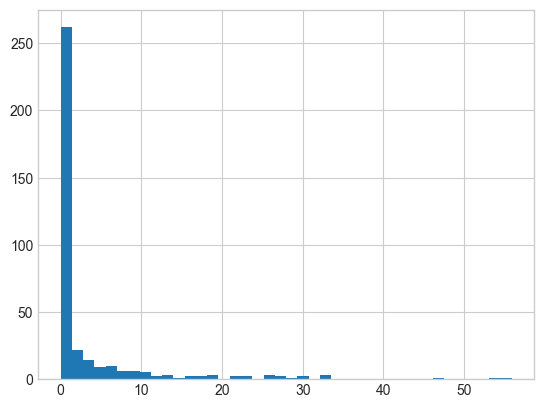

In [6]:
plt.hist(rainfall_nm, 40)
# this gives us a general idea of what the data looks like but it is hard to tell what the distribution is

In [7]:
# the results of comparison operators are boolean values (True or False)
x = np.array([1, 2, 3, 4, 5])
x < 3  # less than

array([ True,  True, False, False, False])

In [8]:
x > 3  # greater than

array([False, False, False,  True,  True])

In [10]:
x <= 3  # less than or equal to

array([ True,  True,  True, False, False])

In [11]:
x >= 3  # greater than or equal to

array([False, False,  True,  True,  True])

In [12]:
x != 3  # not equal to

array([ True,  True, False,  True,  True])

In [13]:
x == 3  # equal to

array([False, False,  True, False, False])

In [14]:
# it is possible to do element-wise comparisons on two arrays and to include compound expressions
(2 * x) == (x**2)

array([False,  True, False, False, False])

In [15]:
# just in the case of arithmetic ufuncs, these will work on arrays of any size and shape
# this is a two dimensional array'
rng = np.random.default_rng(seed=1701)
x = rng.integers(10, size=(3, 4))
x

array([[9, 4, 0, 3],
       [8, 6, 3, 1],
       [3, 7, 4, 0]])

In [16]:
x < 6

array([[False,  True,  True,  True],
       [False, False,  True,  True],
       [ True, False,  True,  True]])

Working with boolean Arrays

In [17]:
print(x)

[[9 4 0 3]
 [8 6 3 1]
 [3 7 4 0]]


In [18]:
# it is ueful to count the number of True entries in a boolean array
np.count_nonzero(x < 6)

8

In [19]:
# we see that there are eight array entries that are less than 6
# can also use np.sum false is interpreted as zero and true is interpreted as one
np.sum(x < 6)

8

In [20]:
# the benifit of np.sum is that like other Numpy aggregation functions, this summation can be done along rows or columns as well
# how many values less than 6 ar in erach row?
np.sum(x < 6, axis=1)

array([3, 2, 3])

In [21]:
# if we're interested in quickly checking whether any or all the values are true, we can use (np.any, np.all)
# are there any values greater than 8
np.any(x > 8)

True

In [22]:
# are there any values less than zero
np.any(x < 0)

False

In [23]:
# are there any values less than 10
np.all(x < 10)

True

In [24]:
# are all values equal to 6
np.all(x == 6)

False

In [25]:
# are all values in each row less than 8
np.all(x < 8, axis=1)

array([False, False,  True])

In [26]:
# for example we can do compound statements
np.sum((rainfall_nm > 10) & (rainfall_nm < 20))

16

In [27]:
# lets demonstrate a more complicated expression. Using de morgan's laws, we can compute the same result in a different way
np.sum(~((rainfall_nm <= 10) | (rainfall_nm >= 20)))

16

In [29]:
# combining comparison operators and boolean operators on arrays can lead to a wide range of efficient operations
# & and | or ^ xor ~ not
print("Number days without rain:  ", np.sum(rainfall_nm == 0))
print("Number days with rain:     ", np.sum(rainfall_nm != 0))
print("Days with more than 10 mm: ", np.sum(rainfall_nm > 10))
print("Rainy days with < 5mm:     ", np.sum((rainfall_nm > 0) & (rainfall_nm < 5)))

Number days without rain:   221
Number days with rain:      144
Days with more than 10 mm:  34
Rainy days with < 5mm:      83


Boolean arrays and masks

In [30]:
# in the preceding section we looked at aggregates computed directly on boolean arrays.
x

array([[9, 4, 0, 3],
       [8, 6, 3, 1],
       [3, 7, 4, 0]])

In [31]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True,  True],
       [ True, False,  True,  True]])

In [32]:
# now to select these values from the array we can simply index on this boolean array this is known as a masking operation
x[x < 5]
# what is returned is a one dimensional array filled with all the values that meet this condition
# in other words, all the values in positions at which the mask array is True

array([4, 0, 3, 3, 1, 3, 4, 0])

In [35]:
# we are free to operate on these values as we wish
# construct a mask of all rainy days
rainy = rainfall_nm > 0

# construct a mask of all summer days (june 21st is the 172nd day)
days = np.arange(365)
summer = (days > 172) & (days < 262)

print("Median precip on rainy days in 2015 (mm):   ", np.median(rainfall_nm[rainy]))
print("Median precip on summer days in 2015 (mm):  ", np.median(rainfall_nm[summer]))
print("Maximum precip on summer days in 2015 (mm): ", np.max(rainfall_nm[summer]))
print(
    "Median precip on non-summer rainy days (mm):",
    np.median(rainfall_nm[rainy & ~summer]),
)
# by combining boolean operations, masking operations, and aggregates, we can very quickly answer these sorts of questions

Median precip on rainy days in 2015 (mm):    3.8
Median precip on summer days in 2015 (mm):   0.0
Maximum precip on summer days in 2015 (mm):  32.5
Median precip on non-summer rainy days (mm): 4.1


In [37]:
# using keywords and/or versus operators &/|
# and and or operate on the object as a whole while & and | operate on the elements within the object
bool(42), bool(0)

(True, False)

In [38]:
bool(42 and 0)

False

In [39]:
bool(42 or 0)

True

In [40]:
# when you use & and | on integers, the expression operates on the bitwise represnetation of the element
# applying the and or the or to the individual bits making up the number
bin(42)
bin(59)
bin(42 & 59)
bin(42 | 59)

'0b111011'

In [41]:
# notice that the corresponding bits of the binary representation are compared in order to yield the result
# when you have an array of boolean values in numpy, this can be thought of as a string of bits where 1 = True and 0 = False
# and & and | will operate similarly to in the previous example
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B

array([ True,  True,  True, False,  True,  True])

In [42]:
# if you use or on these arrays, it will try to evaluate the truth or falsehood of the entire array object which is not a well defined value
A or B
# when evaluating a boolean expression on a given array you should use | or & rather than or or and

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [43]:
x = np.arange(10)
(x > 4) & (x < 8)

array([False, False, False, False, False,  True,  True,  True, False,
       False])

In [44]:
# trying to evaluate the truth or falsehood of the entire array will give a value error
(x > 4) and (x < 8)
# remember that and and or perform a single boolean evaluation on an entire object, while & and | perform multiple boolean evaluations on the content (the individual bits or bytes) of an object

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Fancy indexing

In [46]:
# fancy indexing is a conceptually simple its passing an array of indices to access multiple array elements at once
rng = np.random.default_rng(seed=1701)
x = rng.integers(100, size=10)
print(x)

[90 40  9 30 80 67 39 15 33 79]


In [47]:
[x[3], x[7], x[2]]

[30, 15, 9]

In [48]:
ind = np.array([[3, 7], [4, 5]])
x[ind]

array([[30, 15],
       [80, 67]])

In [49]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [50]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

In [51]:
# the first value in the result is X[0, 2], the second is X[1, 1], and the third is X[2, 3]
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [52]:
# each row is matched with each column vector, exactly as we saw in broadcasting of arithmetic operations
row[:, np.newaxis] * col
# with fancy indexing, the return value reflects the broadcasted shape of the indices, rather than the shape of the array being indexed

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

In [53]:
# combined indexing
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [55]:
# we can combine fancy and simple indices
X[2, [2, 0, 1]]

array([10,  8,  9])

In [56]:
# we can also combine fancy indexing with slicing
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [57]:
# we can combine fancy indexing with masking
mask = np.array([True, False, True, False])
X[row[:, np.newaxis], mask]
# all of these indexing options combined lead to a very flexible set of operations for accessing and modifying array values

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

Selecting Random points

In [58]:
# one common use of fancy indexing is the selection of subsets of rows from a matrix for example we might have an N by D matrix representing N points in D dimensions such as the following points drawn from a two dimensional normal distribution
mean = [0, 0]
cov = [[1, 2], [2, 5]]
X = rng.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

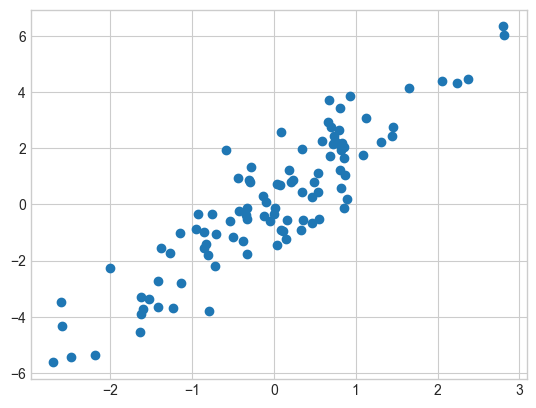

In [60]:
# using the plotting tools we can visualize these points as a scatter plot
plt.scatter(X[:, 0], X[:, 1])

In [61]:
# we can use fancy indexing to select 20 random points we choose 20 random indices with no repeats and use these indices to select a portion of the original array
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([23, 14, 99, 63,  4, 75, 17, 16,  8, 71, 61, 38, 31, 74, 57, 96, 29,
       55,  9, 88])

In [62]:
selection = X[indices]  # fancy indexing here
selection.shape

(20, 2)

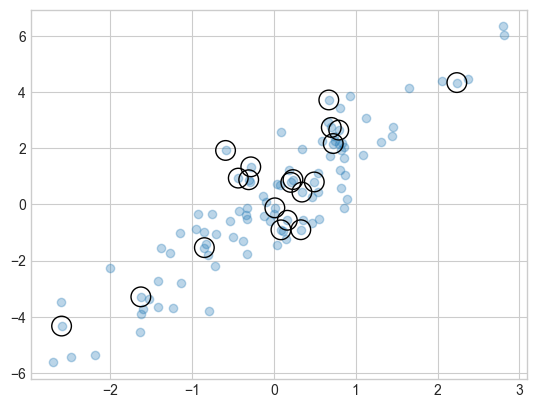

In [63]:
# now to seee which points were selected we will overplot large circles at the locations of the selected points
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1], facecolor="none", edgecolor='black', s=200);
# this is often used to quickly partition datasets, as is often needed in train/test splitting for validation of statistical models and in sampling approaches to answering statistical questions

Modifying values with fancy indexing

In [64]:
# just as fancy indexing can be used to access parts of an array, it can also be used to modify parts of an array
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [65]:
# we can use any assignment type for example
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


In [66]:
# notice though that repeated indices with these operations can cause some potentially unexpected results
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [67]:
# where did the 4 go? the result of this operation is to first assign x[0] = 4, followed by x[0] = 6
# consider this operation
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x
# you might expect that x[3] would contain the value 2 and x[4] would contain the value 3, as this is how many times each index is repeated but this is not the result because x[i] += 1 is meant as a shorthand of x[i] = x[i] + 1
# x[i] + 1 is evaluated, and then the result is assigned to the indices in x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [69]:
# so if we want the other behavior where the operation is repeated for this we can use the at method of ufuncs
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)
# the at method does an in place application of the given operator at the specified indices (here, i) with the specified value (here, 1). another method that is simalar in spirit is the reduceat method of ufuncs which you can read about in the numpy documentation

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


In [71]:
# example: binning data
rng = np.random.default_rng(seed=1701)
x = rng.normal(size=100)
# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)
# find the appropriate bin for each x
i = np.searchsorted(bins, x)
# add 1 to each of these bins
np.add.at(counts, i, 1)

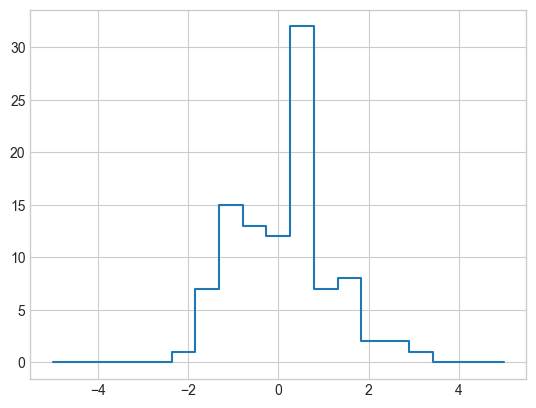

In [73]:
# the counts now reflect the number of points within eahc bin in other words, this is a histogram
plt.plot(bins, counts, drawstyle='steps');

In [74]:
# this function will create a nearly identical plot to the one shown. to compute the binning matplotlib provides the np.histogram function which does the same thing in a single line
print(f"Numpy histogram ({len(x)} points):")
%timeit counts, edges = np.histogram(x, bins)

print(f"Custom histogram ({len(x)} points):")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

Numpy histogram (100 points):
22.2 µs ± 735 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Custom histogram (100 points):
14.3 µs ± 51 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [75]:
# the np.histogram function is flexable and has many options to fine tune the computation
x = rng.normal(size=1000000)
print(f"NumPy histogram ({len(x)} points):")
%timeit counts, edges = np.histogram(x, bins)

print(f"Custom histogram ({len(x)} points):")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)
# this shows that sometimes things are better on small datasets and sometimes they are better on large datasets the only way to know is to test

NumPy histogram (1000000 points):
68.9 ms ± 1.82 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom histogram (1000000 points):
113 ms ± 5.77 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
